My data:

https://www.kaggle.com/c/titanic/data

    

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Passengers information about age-cabin-class-emarked

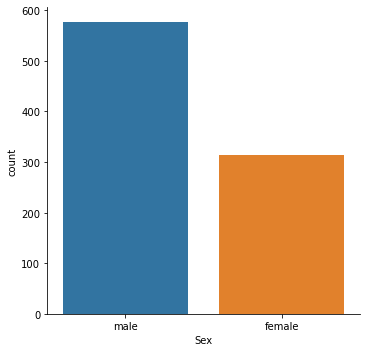

In [5]:
#gender distrubution 
sns.catplot('Sex',data=titanic_df,kind='count');

Male population is nearly twice of female population.

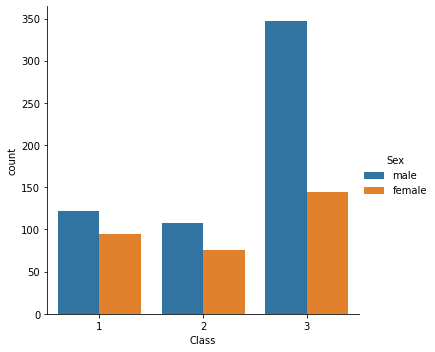

In [156]:
#class distrubution on gender
sns.catplot('Pclass',data = titanic_df,hue = 'Sex', kind= 'count')
plt.xlabel('Class');

Male population is at 3rd class more than other classes.

In [8]:
def male_female_child(passenger):
    Age,Sex = passenger
    
    if Age <16:
        return 'child'
    else:
        return Sex

In [9]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)

In [10]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


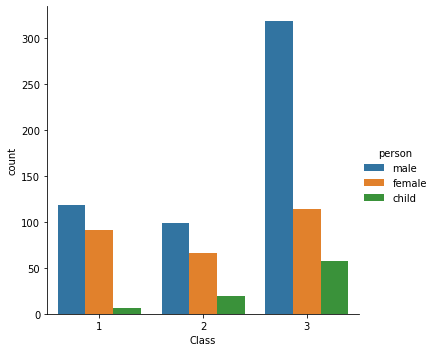

In [157]:
#children-female-male distribution
sns.catplot('Pclass',data = titanic_df, hue ='person',kind='count')
plt.xlabel('Class');

Children population is at 3rd class more than other classes.

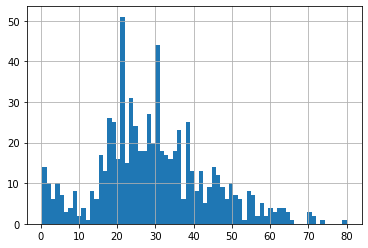

In [117]:
#Age distribution
titanic_df['Age'].hist(bins=70);

In [16]:
titanic_df['Age'].mean()

29.69911764705882

In [17]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

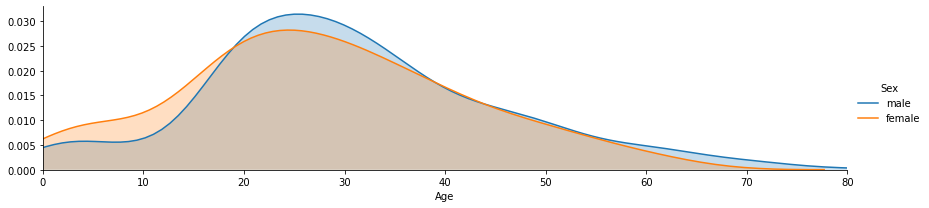

In [26]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect = 4)

fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend();


Age distribution is between 20s and 30s.So,passengers include young adults mostly.

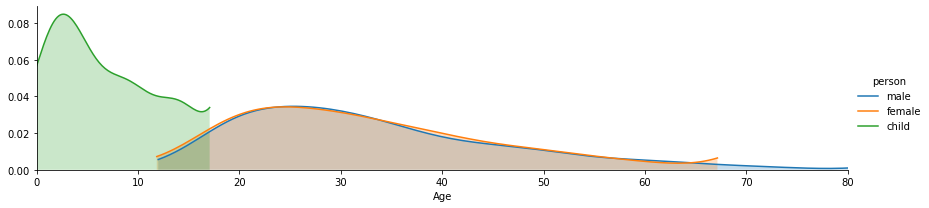

In [35]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect = 4)

fig.map(sns.kdeplot,'Age',shade=True, cut=1)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend();

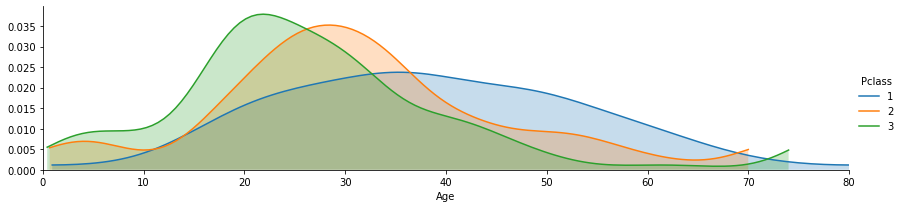

In [37]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect = 4)

fig.map(sns.kdeplot,'Age',shade=True, cut=0)

fig.set(xlim=(0,titanic_df['Age'].max()))

fig.add_legend();

At the 1st class passengers include the elderly people mostly,however at the 3rd class passengers include the young adults.

In [38]:
deck = titanic_df['Cabin'].dropna()

In [39]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

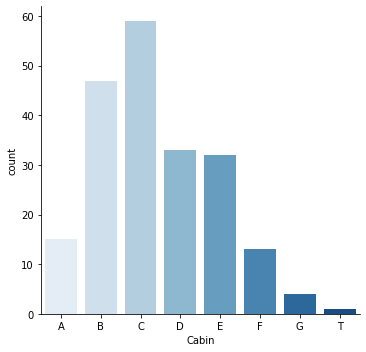

In [48]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df,palette = 'Blues',order = ['A','B','C','D','E','F','G','T'],kind = 'count');

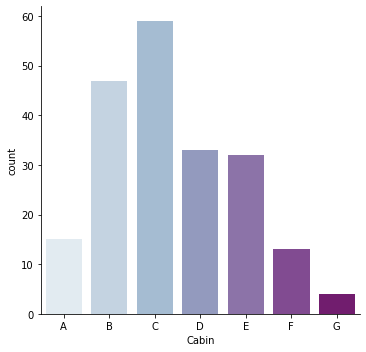

In [47]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin',data=cabin_df,palette = 'BuPu',order = ['A','B','C','D','E','F','G'],kind = 'count');

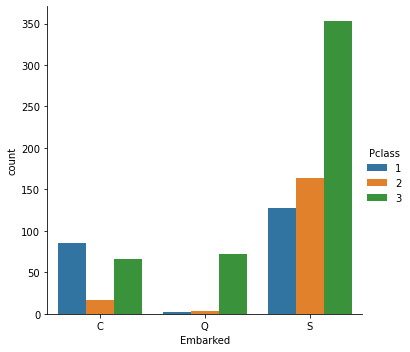

In [120]:
#Port of embarkation
sns.catplot('Embarked',data = titanic_df,hue ='Pclass',order= ['C','Q','S'],kind='count');

'C' represents port of embrakation from Cherbourg,'Q' represents port of embarkation from Queenstown,'S' represents port of embarkation from Southampton.According to graph, Queenstown is at lower level in terms of social-economical structure than Cherbourg and Southampton.

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,with_who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [53]:
titanic_df['with_who'] = titanic_df.SibSp + titanic_df.Parch

In [55]:
titanic_df['with_who'].head()

0    1
1    1
2    0
3    1
4    0
Name: with_who, dtype: int64

In [56]:
titanic_df['with_who'].loc[titanic_df['with_who']>0] = 'with family'

titanic_df['with_who'].loc[titanic_df['with_who'] == 0] = 'Alone'

/Users/isilselcuk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,with_who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


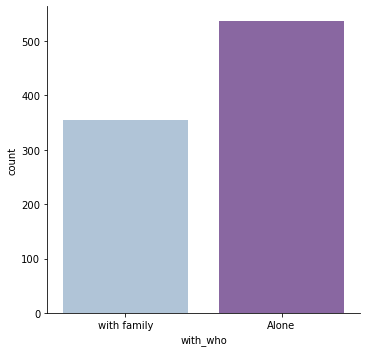

In [60]:
sns.catplot('with_who',data= titanic_df,palette = 'BuPu',kind= 'count');

# Survived relations with gender-age-class-cabin


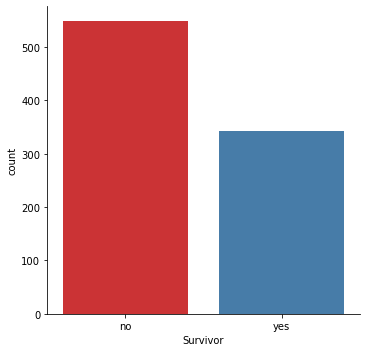

In [150]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot('Survivor',data=titanic_df,palette = 'Set1',kind= 'count');

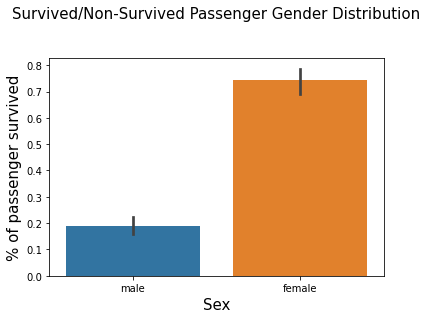

In [147]:
ax=sns.barplot('Sex','Survived',data=titanic_df)

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 15,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

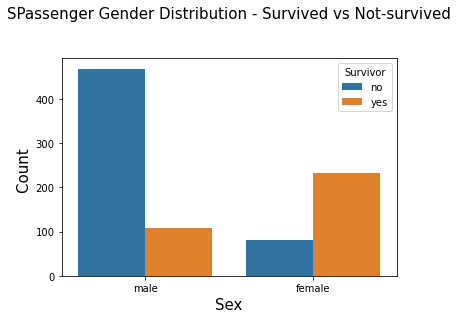

In [148]:
sns.countplot('Sex',hue='Survivor',data=titanic_df)

plt.title("SPassenger Gender Distribution - Survived vs Not-survived", fontsize = 15,loc = 'center', pad = 40)
plt.ylabel("Count ", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

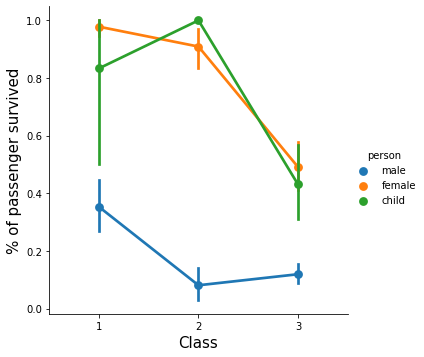

In [136]:
sns.catplot('Pclass','Survived',hue= 'person',data=titanic_df,kind='point')

plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Class",fontsize = 15);

This point graph above shows the survived percentage of female,male and child according to the classes.This graph shows that ~35% male passenger survived at 1st class which is the  highest value amoung the male survived percentage,while ~95% female passenger survived. At the 2nd class child survived percentage is ~99% ,in other words it can be said that all children in 2nd class are survived.

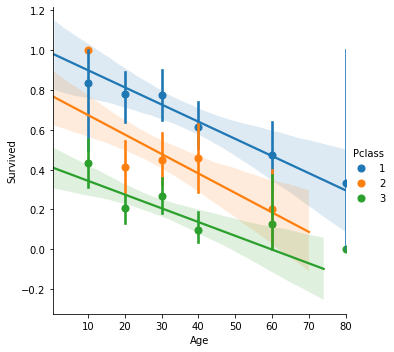

In [95]:
generations = [10,20,30,40,60,80]

sns.lmplot('Age','Survived',hue= 'Pclass',data=titanic_df,x_bins = generations);


The survived percentage of people at 30s for all classes is higher. 

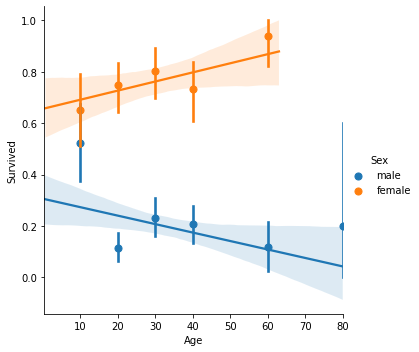

In [96]:
sns.lmplot('Age','Survived',hue= 'Sex',data=titanic_df,x_bins = generations);

According to the graph above,the survived percentage for female passengers at 60s is ~90%.The highest survived percentage amoung the male passengers is ~50%.   

In [161]:
titanic_df['Cabin'].fillna('Z')
levels = []

for level in deck:
    levels.append(level[0])

titanic_df['Cabin'] = DataFrame(levels)


In [162]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,with_who,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,G,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,male,Alone,no


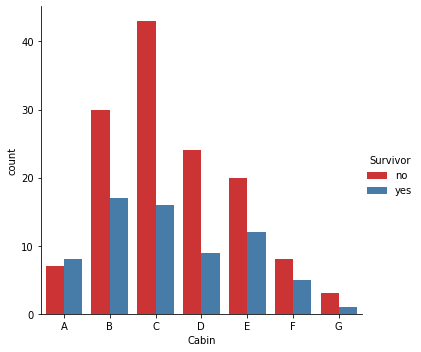

In [140]:
sns.catplot('Cabin',hue= 'Survivor',data=titanic_df,order=['A','B','C','D','E','F','G'],palette= 'Set1',kind='count');

This count plot shows the actual distribution of passengers at cabins that survived and did not survive. It shows that among all the passengers at cabin A ~8 survived and ~ 5 did not survive. While among the passengers at cabin C ~50 survived and ~15 did not survive.The passangers at cabin C did not survive mostly but people at cabin B survived mostly. 

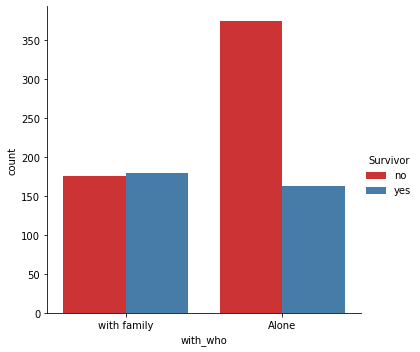

In [115]:
sns.catplot('with_who',hue = 'Survivor',data=titanic_df,palette = 'Set1', kind= 'count');

/Users/isilselcuk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


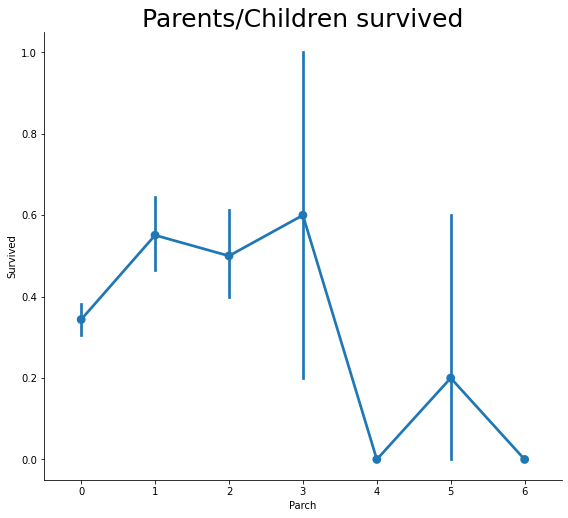

In [158]:
sns.catplot(x = "Parch", y = "Survived", data = titanic_df,kind = "point",size = 8)
plt.title("Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

Passenger who traveled in big groups with parents/children had less survival rate than other passengers.

/Users/isilselcuk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


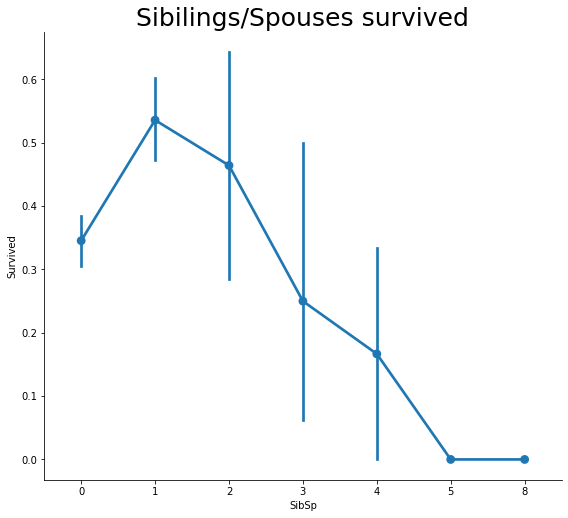

In [160]:
sns.catplot(x =  "SibSp", y = "Survived", data = titanic_df,kind = "point",size = 8)
plt.title('Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

While, passenger who traveled in small groups with sibilings/spouses had better changes of surviving than other passengers.